# DR PRODTECH - DEMOGRAPHICS & FINANCE REPORT

In [1]:
## UPDATE DATA FILENAME HERE
source = './data/2025-11-13-PT-all-employees.xlsx'

In [2]:
## EXPORT THIS REPORT:
## cd '/Users/demed/Library/CloudStorage/OneDrive-DigitalRoute/ADMIN/HR/PRODTECH DEMOGRAPHICS/Jupyter/'
## /Users/demed/Library/Python/3.9/bin/jupyter-nbconvert PT-demographics-for-CTO-2025.ipynb --to html --no-input --output=reports/$(date +%Y-%m-%d)-PT-demographics-for-CTO-FULL
## OPEN IN GOOGLE CHROME
##PRINT TO PDF

In [3]:
  print(
        "\n\n",
        "\033[1;43m",
        "CONFIDENTIAL AND PRIVILEGED - do not forward",
        "\033[0m",
        "\n",
    )



  CONFIDENTIAL AND PRIVILEGED - do not forward  



In [4]:
## PYTHON PACKAGES TO INSTALL TO RUN THIS NOTEBOOK

## %pip install pandas
## %pip install matplotlib
## %pip install squarify
## %pip install jupyterthemes
## %pip install --upgrade jupyterthemes
## %pip install missingno
## %pip install joypy
## %pip install seaborn
## %pip install plotly
## %pip install openpyxl

In [5]:
## IMPORT REQUIRED PACKAGES
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
import datetime
import joypy
import plotly.express as px
from locale import atof
from IPython.display import HTML
import squarify
import calendar

locale.setlocale(locale.LC_NUMERIC, '')

'C'

In [6]:
## SUPPRESS WARNINGS
# this can be dangerous but too messy output with all the warnings...

import warnings

warnings.filterwarnings('ignore')
#warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="ignore", category=warn_singular)

In [7]:
## SET THE JUPYTER THEME HERE (to get a list of theme, just enter a garbage value to get an error containing list of valid themes)
!jt -t solarizedl -f roboto -fs 12 -nf roboto -nfs 12 -tf roboto -tfs 12 -ofs 12 -cellw 90% -T -N

In [8]:
## SET VARIOUS DISPLAY OPTIONS
## Pandas displays options (number formats etc.)

# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

def highlight_female(val):
    color = "cornsilk" if val == "Female" else ""
    return "background-color: %s" % color

def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display
    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000
    display.precision = 0  # set as needed
    display.float_format = lambda x: '{:,.2f}'.format(x)  # set as needed

# pd.options.display.float_format = "{:,.2f}".format
set_pandas_display_options()

format_percentages = "{0:.0f}%".format
format_SEK = "{0:,.0f} SEK".format

In [9]:
## FORMAT MAPPING FOR VARIOUS COLUMNS

format_mapping = {
    "age": "{:,.0f}",
    "bonus_attainment": "{:.0%}",
    "bonus_percentage": lambda x: "{:.0%}".format(x) if not np.isnan(x) else "",
    "bonus_sek": lambda x: "{:,.0f}".format(x) if not np.isnan(x) else "",
    "bonus": lambda x: "{:,.0f}".format(x) if not np.isnan(x) else "",
    "count": "{:,.0f}",
    "date": lambda t: t.strftime("%Y-%m-%d") if ((pd.notna(t)) & (t != "")) else "",
    "employee_cost_vs_dev": "{:.0%}",
    "employee_cost": "{:,.0f} SEK",
    "end": lambda t: t.strftime("%Y-%m-%d") if ((pd.notna(t)) & (t != "")) else "",
    "everyone": '{:,.0f} SEK', 
    "female": '{:,.0f} SEK',
    "forex": "{:,.2f}",
    "male": '{:,.0f} SEK', 
    "median_cost": '{:,.0f} SEK',
    "median_salary": "{:,.0f}",
    "median_TTC": '{:,.0f} SEK', 
    "pct_cost": "{:.0%}",
    "pct_headcount": "{:.0%}",
    "pct_total_employees": "{:.0%}",
    "percentage": "{:.0%}",
    "portion_of_ProdTech": '{:,.0%}',
    "ratio": '{:.0%}',
    "salary_sek": "{:,.0f}",
    "salary_vs_dev": "{:.0%}",
    "salary": "{:,.0f}",
    "social": "{:.0%}",
    "start": lambda t: t.strftime("%Y-%m-%d") if ((pd.notna(t)) & (t != "")) else "",
    "sum": "{:,.0f}",
    "tenure": "{:,.0f}",
    "total_cost": '{:,.0f} SEK',
    "total_salary": '{:,.0f} SEK',
    "total_TTC": '{:,.0f} SEK',
    "total": "{:,.0f}",
    "TTC_sek": "{:,.0f}",
    "TTC_vs_dev": "{:.0%}",
    "TTC": "{:,.0f}",
    "variable portion": "{:,.0f}"
}


## DATA IMPORT & FORMATTING

1. In DigiPeople, go to Reports, select "DATA - FOR JUPYTER NB EXPORTS v2" 
2. "Export to Excel" format.

In [10]:
## IMPORT THE EMPLOYEE DATA CONTAINED IN A CSV TO A DATAFRAME
missing_values = ["n/a","na","--"," "]

## to import from an XLSX file
## If no sheet name is provided, it will read the first sheet by default

df = pd.read_excel(source,
                   sheet_name ='Sympa', 
                   na_values = missing_values)

#print(df_raw.head())

In [11]:
## CHECK THE DATA

print("XLS file, df:\n")
print("Number of rows in file:",len(df))
print("Number of columns in file:",len(df.columns))
#display("Column names:",list(df_raw.columns))
#print("Column names and types:\n\n",df_raw.dtypes)

#print(df_raw.head())

expected_columns = [
    "Surname",
    "First name",
    "Employee number",
    "Type of contract",
    "Region",
    "Country",
    "Office location",
    "Gender",
    "Function",
    "Department",
    "Team",
    "My monthly salary",
    "Annual on target bonus entitlement",
    "Bonus split (in %)",
    "Currency",
    "Start date",
    "End date",
    "Date of birth",
    "is-manager",
    "Manager",
    "Cost center number",
    "Cost center name",
    "Job title"
]

expected_dtypes = {
    "Surname": "object",
    "First name": "object",
    "Employee number": "int64",
    "Type of contract": "object",
    "Region": "object",
    "Country": "object",
    "Office location": "object",
    "Gender": "object",
    "Function": "object",
    "Department": "object",
    "Team": "object",
    "My monthly salary": "float64",
    "Annual on target bonus entitlement": "float64",
    "Bonus split (in %)": "float64",
    "Currency": "object",
    "Start date": "datetime64[ns]",
    "End date": "datetime64[ns]",
    "Date of birth": "datetime64[ns]",
    "is-manager": "object",
    "Manager": "object",
    "Cost center number": "int64",
    "Cost center name": "object",
    "Job title": "object",
}

# Check the names of the columns in df_raw against the "expected_columns" list and highlight differences if any
actual_columns = set(df.columns)
expected_columns_set = set(expected_columns)

# Find differences
missing_from_actual = expected_columns_set - actual_columns
extra_in_actual = actual_columns - expected_columns_set

print("COLUMN COMPARISON:")
print("=" * 80)

if missing_from_actual or extra_in_actual:
    print("❌ DIFFERENCES FOUND:")
    print()
    
    if missing_from_actual:
        print("🔴 Missing from source file (expected but not found):")
        for col in sorted(missing_from_actual):
            print(f"   - {col}")
        print()
    
    if extra_in_actual:
        print("🟡 Extra in source file (found but not expected):")
        for col in sorted(extra_in_actual):
            print(f"   + {col}")
        print()
    
    # Show side-by-side comparison
    print("SIDE-BY-SIDE COMPARISON:")
    print("-" * 80)
    print(f"{'SOURCE FILE COLUMNS':<40} | {'EXPECTED COLUMNS':<40}")
    print("-" * 80)
    
    max_len = max(len(df.columns), len(expected_columns))
    actual_sorted = sorted(df.columns)
    expected_sorted = sorted(expected_columns)
    
    for i in range(max_len):
        actual_col = actual_sorted[i] if i < len(actual_sorted) else ""
        expected_col = expected_sorted[i] if i < len(expected_sorted) else ""
        
        # Highlight differences
        actual_marker = "❌" if actual_col in extra_in_actual else "✓ " if actual_col else "  "
        expected_marker = "❌" if expected_col in missing_from_actual else "✓ " if expected_col else "  "
        
        print(f"{actual_marker} {actual_col:<37} | {expected_marker} {expected_col:<37}")
    
    raise ValueError("Differences in columns found vs what was expected. Please check the column names.")
else:
    print("✅ All column names match the expected list.")

## We expect 23 columns in the source file - if not, error out and stop
if len(df.columns) != len(expected_columns):
    raise ValueError(f"expected {len(expected_columns)} columns in the source file, but found {len(df.columns)}")

if set(df.columns) != set(expected_columns):
    raise ValueError("Column names of df_raw do not match the expected list")

for column, dtype in expected_dtypes.items():
    if df[column].dtype != dtype:
        raise ValueError(f"Column '{column}' of df has incorrect dtype. Expected '{dtype}', but found '{df[column].dtype}'")

print("✅ Columns and data types seem to match what was expected")

XLS file, df:

Number of rows in file: 225
Number of columns in file: 23
COLUMN COMPARISON:
✅ All column names match the expected list.
✅ Columns and data types seem to match what was expected


In [12]:
## IMPORT THE COST CENTER INFO (STORED IN A SEPARATE XLS FILE)

missing_values = ["n/a", "na", "--", " "]

## to import from an XLSX file
ref_cc = pd.read_excel('data/cost-centers.xlsx', 
                   sheet_name ='cost-centers', 
                   na_values = missing_values)

ref_cc["CC"] = ref_cc["CC"].astype("Int64").astype("str")

#display(ref_cc)
#print("Column names and types:\n\n",ref_cc.dtypes)


In [13]:
## CREATE REFERENCE TABLE (foreign exchange rates, social charges, etc.)
## rather than importing this data we will simply set it here
'''ref = pd.read_csv('data/reference-data.csv', 
                  delimiter = ",", 
                  thousands = ",", 
                  decimal = ".", 
                  index_col=None, 
                  encoding='utf-8')'''

## COMMENT: I have no idea what social overhead for Italy, through Deel, might be...

#data = {'country':['Denmark', 'Italy', 'Japan', 'Sweden', 'USA', 'Bulgaria', 'Malaysia'],
#        'currency':['DKK','EUR','JPY','SEK','USD','BGN','MYR'],
#        'forex':[1.55,11.5,1,0.07,10.6,5.9,2.3],
#        'social':[0.45,0.45,0.53,0.45,0.23,0.12,0.18],
#        'bonus_attainment':[0.85,0.85,0.85,0.85,0.85,0.85,0.85],
#        'months':[12,12,12,12,12,12,13]}
#ref = pd.DataFrame(data)

## IMPORT SOME REFERENCE (FOREX, etc.) INFO (STORED IN A SEPARATE XLS FILE)

missing_values = ["n/a", "na", "--", " "]

## to import from an XLSX file
ref = pd.read_excel('data/reference-forex-etc.xlsx', 
                                   sheet_name ='ref', 
                                   na_values = missing_values)

ref.drop(columns=['notes'], inplace=True)

#ref["CC"] = ref_cc["CC"].astype("Int64").astype("str")

#display(ref)
#print("Column names and types:\n\n",ref.dtypes)


In [14]:
## We will use the Currency column as the index to facilitate lookups
ref.set_index('currency', inplace=True)

In [15]:
## DATA QUALITY VISUAL CHECK
## the below is to get a visual overview of the data, to visually spot data quality issues
#import missingno as msno
#%matplotlib inline
#msno.matrix(df_raw)

In [16]:
## COLUMNS RENAME
## (also changing "is-manager" to ismanager as the hyphen can be problematic when referencing specific dataframe fields using the dotted notation)
# print("Number of columns in df:",len(df.columns))
#print("Column names and types:\n\n",df.dtypes)

df.columns = [
    "lname",
    "fname",
    "enumber",
    "contract",
    "region",
    "country",
    "city",
    "gender",
    "function",
    "dept",
    "team",
    "salary",
    "bonus",
    "variable portion",
    "currency",
    "start",
    "end",
    "dob",
    "ismanager",
    "manager",
    "CC",
    "CC_name",
    "title",
]

In [17]:
## CONVERT VARIOUS DATES FROM OBJECT TO DATETIME (not really needed when importing from XLS)

#df['start']=pd.to_datetime(df["start"], format = '%m/%d/%y')
#df['end']=pd.to_datetime(df["end"], format = '%m/%d/%y')

df['start']=pd.to_datetime(df["start"], errors='coerce')
df['end']=pd.to_datetime(df["end"], errors='coerce')
df['dob']=pd.to_datetime(df["dob"], errors='coerce')

#df.end.head(15)

In [18]:
## CONVERT COST CENTER NUMBER FROM FLOAT64 TO OBJECT/STRING (we will not use it in any math operations, it's an ID)
#df['CC'].info()
df['CC'] = df['CC'].astype('Int64').astype('str')
#df['CC'].info()

#df.CC.value_counts().sort_values(ascending=False)

In [19]:
## CONVERT IS-MANAGER TO BOOLEAN TRUE OR FALSE

df.ismanager = df.ismanager.astype(str)
#print(df.ismanager.value_counts())
## All strings are evaluated as "True" when you convert an object to a boolean. 
## So it's not enough to do string substitutions to True and False. Instead, do a mapping as below:
df.ismanager = df.ismanager.map({'nan':False, 'is-manager':True})
#print(df.ismanager.value_counts())
#df.ismanager.head(20)

In [20]:
#df.dtypes

## Now, you should see this.
## * all dates should be datetime64.
## * all numbers should be float64
## * is-manager should be bool (Boolean)

#lname                object
#fname                object
#enumber               int64
#contract             object
#region               object
#country              object
#city                 object
#gender               object
#function             object
#dept                 object
#team                 object
#salary              float64
#bonus               float64
#currency             object
#start        datetime64[ns]
#end          datetime64[ns]
#dob          datetime64[ns]
#ismanager              bool
#manager              object
#CC                  float64
#CC name              object
#title                object
#dtype: object


In [21]:
## VALUES SUBSTITUTIONS
## Substitute some values with more concise values (for display)

df['dept'] = df['dept'].replace(['Usage Engine Cloud Edition'], 'CE')
df['dept'] = df['dept'].replace(['MediationZone, Usage Engine Private Edition'], 'MZ/PE')
df['dept'] = df['dept'].replace(['Site Reliability Engineering'], 'SRE')
df['dept'] = df['dept'].replace(['Engineering Enablement'], 'Enablement')
df['dept'] = df['dept'].replace(['Product Documentation'], 'Doc')
df['dept'] = df['dept'].replace(['Product Design'], 'Design')
df['dept'] = df['dept'].replace(['Product Management Mediation Zone/Private Edition'], 'PM MZ/PE')
df['dept'] = df['dept'].replace(['Product Management Cloud Edition'], 'PM CE')
df['function'] = df['function'].replace(['Product Management'], 'PM')

In [22]:
## CLARIFY PRODUCTS SPECIALIZATION FOR DOT TEAM MEMBERS
# Update department assignments for specific individuals
df.loc[df['lname'] == 'Hatami', 'dept'] = 'DOT CE'
df.loc[df['lname'] == 'Jain', 'dept'] = 'DOT CE'  
df.loc[df['lname'] == 'Kumar Krishnamurthy', 'dept'] = 'DOT MZ'
df.loc[df['lname'] == 'Lim', 'dept'] = 'DOT MZ'
df.loc[df['lname'] == 'Olsson', 'dept'] = 'DOT MZ'

In [23]:
## CLARIFY PRODUCTS SPECIALIZATION FOR UX TEAM MEMBERS
# Update department assignments for Product Design team members based on their product specialization
df.loc[df['lname'] == 'Akbarnejad', 'dept'] = 'Design CE'
df.loc[df['lname'] == 'Farkas', 'dept'] = 'Design CE'
df.loc[df['lname'] == 'Tan', 'dept'] = 'Design MZ'


In [24]:
## CLARIFY PRODUCTS SPECIALIZATION FOR PRODUCT DOCUMENTATION TEAM MEMBERS
# Update department assignments for Product Documentation team members based on their product specialization
df.loc[df['lname'] == 'Borrelli', 'dept'] = 'Doc CE'
df.loc[df['lname'] == 'Han', 'dept'] = 'Doc CE'
df.loc[df['lname'] == 'Silvaratnam', 'dept'] = 'Doc MZ'
df.loc[df['lname'] == 'Wallin', 'dept'] = 'Doc MZ'
df.loc[df['lname'] == 'Wu', 'dept'] = 'Doc MZ'


In [25]:
## SORT THE DATAFRAME BY START DATE, LAST NAME, FIRST NAME

df=df.sort_values(by=['start','lname','fname'],ignore_index=True)

In [26]:
## this should display the last hired employees
#df.tail(15)

## AUGMENT THE DATA (CALCULATED COLUMNS, ETC)

In [27]:
## AUGMENT DATA

## df is our canonical dataframe, containing a clean version of what was exported from DigiPeople.
## From here on we will use copies of this dataframe.
## df_ext is the enriched dataframe

In [28]:
df_ext = df

In [29]:
## NEW CALCULATED COLUMS

## create column with age, computed from DOB

def calc_age(birthdate):
    today = pd.to_datetime('today').normalize()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

df_ext['age'] = df_ext.dob.apply(calc_age)
#display(df_ext[['dob','age']])

# REPORT START - OVERVIEW

In [30]:
import re

print("date of report: ",
      '\033[1m' + pd.to_datetime('today').strftime("%Y-%m-%d") + '\033[0m'
      )
# Extract timestamp from source filename
timestamp_match = re.search(r'(\d{4}-\d{2}-\d{2})', source)
if timestamp_match:
      datafile_timestamp = timestamp_match.group(1)
      print("datafile timestamp:", 
                  '\033[1m' + datafile_timestamp + '\033[0m'
                  )
else:
      print("datafile timestamp: not found in filename")



date of report:  2025-11-14
datafile timestamp: 2025-11-13


In [31]:
  print(
        "\n\n",
        "\033[1;103m",
        "CONFIDENTIAL AND PRIVILEGED - do not forward",
        "\033[0m",
        "\n",
    )



  CONFIDENTIAL AND PRIVILEGED - do not forward  



## OVERVIEW - PRODTECH TODAY

(i.e. employees or contractors who do not have an employment end date)


In [32]:
# todo: should probably not just look at employees with no end date but rather look at 
# employees whose end date is later than today

today = pd.to_datetime('today').normalize()

# if we define as "active" employees without an end date already set:
#df_active = df_ext[df_ext.end.isnull()]

# if we define as "active" employees without an end date or whose end date is in the future
df_active = df_ext[ (df_ext.end.isnull()) | (df_ext['end']>today)]

print("ProdTech total size as of today")
print("═" * 20)
print(f"   ★★★  " + "\033[1;103m\033[2m" + " " + str(len(df_active)) + " " + "\033[0m" + "  ★★★")
print("═" * 20)

print("\nWhat does this number include? \n* All signed hires (regardless of whether they have started or not)" + 
      "\n* All active employees (i.e. those without an end date or whose end date is in the future)." +
      "\n* Any contractors (LTC, sub-contractor or employees through Deel), regardless of their utilization level")

print("\nnote: this number may differ from what you see in DigiPeople, because the org chart in DigiPeople include all people who are still on the books, i.e. whose \"last day of employment\" (different from end date) is in the future.")
discrete_functions = df_active['function'].unique()
print("\nTeams (functions) included in this report:")
for func in discrete_functions:
      print(f"- {func}")

ProdTech total size as of today
════════════════════
   ★★★   95   ★★★
════════════════════

What does this number include? 
* All signed hires (regardless of whether they have started or not)
* All active employees (i.e. those without an end date or whose end date is in the future).
* Any contractors (LTC, sub-contractor or employees through Deel), regardless of their utilization level

note: this number may differ from what you see in DigiPeople, because the org chart in DigiPeople include all people who are still on the books, i.e. whose "last day of employment" (different from end date) is in the future.

Teams (functions) included in this report:
- PM
- Engineering Operations
- Engineering
- Customer Support
- Security


In [33]:
# Create breakdown of people per contract type with both counts and percentages
sf_contract = df_active.contract.value_counts().sort_values(ascending=False)
df_contract_breakdown = pd.DataFrame({'contract_type': sf_contract.index, 'count': sf_contract.values})

# Calculate percentages
df_contract_breakdown['percentage'] = (df_contract_breakdown['count'] / df_contract_breakdown['count'].sum())

# Add total row
df_contract_breakdown_display = df_contract_breakdown.copy()
df_contract_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_contract_breakdown['count'].sum(), 1.0]

print("ProdTech Team Breakdown by Contract Type:")
display(df_contract_breakdown_display
    .style
    .format(format_mapping)
    .hide(axis='index')
    .highlight_max(subset=['count'], color='lightgreen')
    .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
    .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
       )

# Show detailed list of non-permanent employees
print("\nDetailed list of all non-permanent employees:")
non_permanent = df_active[df_active['contract'] != 'Permanent'][['fname', 'lname', 'contract', 'start', 'end', 'function', 'title']]

if len(non_permanent) > 0:
    display(non_permanent
        .sort_values(by=['contract', 'start'])
        .style
        .format(format_mapping)
        .hide(axis='index')
       )
else:
    print("No non-permanent employees found in active employee dataset.")

ProdTech Team Breakdown by Contract Type:


contract_type,count,percentage
Permanent,90,95%
Sub Contractor,3,3%
Employed via partner,1,1%
Long term Contractor,1,1%
//// TOTAL ////,95,100%



Detailed list of all non-permanent employees:


fname,lname,contract,start,end,function,title
Magnus,Vojbacke,Employed via partner,2011-10-17,,Engineering Operations,SRE Engineer
Bartlomiej,Talarek,Long term Contractor,2017-12-01,,Customer Support,L3 Support Engineer
Gaurav,Dixit,Sub Contractor,2022-11-07,,PM,"Lead Product Manager, Analytics and Machine Learning"
Kreshnaa,Raam,Sub Contractor,2023-02-23,2026-12-31,PM,Software Engineer
Shashank,Kumar Sahu,Sub Contractor,2025-05-08,2026-12-31,PM,Software Engineer


In [34]:
# Create breakdown of people per function with both counts and percentages
sf_function = df_active.function.value_counts().sort_values(ascending=False)
df_function_breakdown = pd.DataFrame({'function': sf_function.index, 'count': sf_function.values})

# Calculate percentages
df_function_breakdown['percentage'] = (df_function_breakdown['count'] / df_function_breakdown['count'].sum())

# Add total row
df_function_breakdown_display = df_function_breakdown.copy()
df_function_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_function_breakdown['count'].sum(), 1.0]

print("ProdTech Team Breakdown by Function:")
display(df_function_breakdown_display
    .style
    .format(format_mapping)
    .hide(axis='index')
    .highlight_max(subset=['count'], color='lightgreen')
    .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
    .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
       )


ProdTech Team Breakdown by Function:


function,count,percentage
Engineering,44,46%
PM,20,21%
Customer Support,19,20%
Engineering Operations,11,12%
Security,1,1%
//// TOTAL ////,95,100%


In [35]:
# Create breakdown of people per product with both counts and percentages
sf_product = df_active.dept.value_counts().sort_index()  # Changed to sort_index() for alphabetical order
df_product_breakdown = pd.DataFrame({'product': sf_product.index, 'count': sf_product.values})

# Calculate percentages
df_product_breakdown['percentage'] = (df_product_breakdown['count'] / df_product_breakdown['count'].sum())

# Add total row
df_product_breakdown_display = df_product_breakdown.copy()
df_product_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_product_breakdown['count'].sum(), 1.0]

# print("ProdTech Team Breakdown by Department (Product):")
# display(df_product_breakdown_display
#     .style
#     .format(format_mapping)
#     .hide(axis='index')
#     .highlight_max(subset=['count'], color='lightgreen')
#     .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
#     .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
#        )


In [36]:
# Create breakdown of people per product with both counts and percentages
# First, create a mapping function to group departments into broader product categories
def map_product_category(dept):
    if pd.isna(dept):
        return "Other"
    elif "CE" in str(dept) or "SRE" in str(dept):
        return "CE"
    elif "MZ" in str(dept) or "PE" in str(dept):
        return "MZ/PE"
    else:
        return "Other"

# Apply the mapping to create product categories
df_active['product_category'] = df_active['dept'].apply(map_product_category)

# Show which departments are mapped to each category for transparency
print("Product category mapping:")
category_mapping = df_active.groupby('product_category')['dept'].unique()
for category, depts in category_mapping.items():
    print(f"• {category} = {', '.join([str(d) for d in depts if pd.notna(d)])}")
print()

# Create breakdown using the new product categories
sf_product = df_active.product_category.value_counts().sort_index()
df_product_breakdown = pd.DataFrame({'product': sf_product.index, 'count': sf_product.values})

# Calculate percentages
df_product_breakdown['percentage'] = (df_product_breakdown['count'] / df_product_breakdown['count'].sum())

# Add total row
df_product_breakdown_display = df_product_breakdown.copy()
df_product_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_product_breakdown['count'].sum(), 1.0]

print("ProdTech Team Breakdown by Product Category:")
display(df_product_breakdown_display
    .style
    .format(format_mapping)
    .hide(axis='index')
    .highlight_max(subset=['count'], color='lightgreen')
    .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
    .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
       )


Product category mapping:
• CE = SRE, PM CE, CE, Design CE, DOT CE, Doc CE
• MZ/PE = PM MZ/PE, DOT MZ, MZ/PE, Doc MZ, Design MZ
• Other = Support Quality Management, L1 APAC/EMEA, L2 AMER/EMEA, L3 EMEA/APAC

ProdTech Team Breakdown by Product Category:


product,count,percentage
CE,31,33%
MZ/PE,36,38%
Other,28,29%
//// TOTAL ////,95,100%


In [37]:
# Create breakdown of people per function within each product category
product_categories = ['CE', 'MZ/PE', 'Other']

for category in product_categories:
    print(f"\n{category} Team Breakdown by Function:")
    
    # Filter active employees for this product category
    df_category = df_active[df_active['product_category'] == category]
    
    if len(df_category) > 0:
        # Create breakdown by function within this category
        sf_function = df_category.function.value_counts().sort_values(ascending=False)
        df_function_breakdown = pd.DataFrame({'function': sf_function.index, 'count': sf_function.values})
        
        # Calculate percentages within this category
        df_function_breakdown['percentage'] = (df_function_breakdown['count'] / df_function_breakdown['count'].sum())
        
        # Add total row
        df_function_breakdown_display = df_function_breakdown.copy()
        df_function_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_function_breakdown['count'].sum(), 1.0]
        
        display(df_function_breakdown_display
            .style
            .format(format_mapping)
            .hide(axis='index')
            .highlight_max(subset=['count'], color='lightgreen')
            .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
            .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
               )
        
        # Create compact names table with one column per function
        print(f"\n{category} Team Members by Function:")
        
        # Get unique functions in this category
        functions = df_category['function'].dropna().unique()
        
        # Create a dictionary to store names by function
        names_by_function = {}
        max_names = 0
        
        for func in functions:
            names = df_category[df_category['function'] == func]['fname'] + ' ' + df_category[df_category['function'] == func]['lname'] + ' (' + df_category[df_category['function'] == func]['dept'].astype(str) + ', ' + df_category[df_category['function'] == func]['title'].astype(str) + ')'
            names_by_function[func] = names.tolist()
            max_names = max(max_names, len(names))
        
        # Create DataFrame with functions as columns
        names_df = pd.DataFrame()
        for func in functions:
            # Pad the list to max_names length with empty strings
            padded_names = names_by_function[func] + [''] * (max_names - len(names_by_function[func]))
            names_df[func] = padded_names
        
        # Display the names table
        display(names_df
                .style
                .hide(axis='index')
                .set_table_styles([
                    {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
                    {'selector': 'td', 'props': [('text-align', 'left'), ('vertical-align', 'top')]}
                ])
               )
    else:
        print(f"No employees found in {category} category")



CE Team Breakdown by Function:


function,count,percentage
Engineering,17,55%
Engineering Operations,7,23%
PM,7,23%
//// TOTAL ////,31,100%



CE Team Members by Function:


Engineering Operations,PM,Engineering
"Magnus Vojbacke (SRE, SRE Engineer)","Jonas Wallenius (PM CE, Product Owner)","Jonas Brandvik (CE, Lead Engineer)"
"Simon Wood Choy Chooi (SRE, Lead SRE Engineer)","Diksha Sethi (PM CE, Group Product Manager)","Carl-Axel Hallgren (CE, Software Engineer)"
"Brian Thong Phang Kee (SRE, SRE Engineer)","Sheela Aleyak (PM CE, Product Owner)","Alex dos Santos Alves (CE, Software Engineer)"
"Cheng Kai Fung (SRE, SRE Engineer)","Navid Akbarnejad (Design CE, Product Designer)","Babak Gholamzadeh (CE, Software Engineer)"
"Navoda Dissanayake (SRE, SRE Engineer)","Casey Lee Han (Doc CE, Technical Writer)","Jee Meng Lam (CE, Software Engineer)"
"Mohsen Hatami (DOT CE, DevOps Engineer)","Felicity Borrelli (Doc CE, Technical Writer)","Rizman Hariz Abdul Latiff (CE, Software Engineer)"
"Deepika Jain (DOT CE, DevOps Engineer)","Richard Farkas (Design CE, Product Design Manager)","Michal Gasek (CE, Lead Architect)"
,,"Chai Shawn Phua (CE, Software Engineer)"
,,"Davion Eng Hoe Teh (CE, Software Engineer)"
,,"Ivan Smirnov (CE, Lead QA Automation Engineer)"



MZ/PE Team Breakdown by Function:


function,count,percentage
Engineering,26,72%
PM,7,19%
Engineering Operations,3,8%
//// TOTAL ////,36,100%



MZ/PE Team Members by Function:


PM,Engineering Operations,Engineering
"Sandra Dusic (PM MZ/PE, Technical Product Manager)","Johan Olsson (DOT MZ, DevOps Engineer)","David Sjölin (MZ/PE, Software Engineer)"
"Jenni Wallin (Doc MZ, Head of Product Documentation)","Szu Yew Lim (DOT MZ, Software Engineer)","Peter Martinsson (MZ/PE, Software Engineer)"
"Kevin Jia Ping Wu (Doc MZ, Technical Writer)","Sarath Kumar Krishnamurthy (DOT MZ, DevOps Engineer)","Anders Eliasson (MZ/PE, Software Engineer)"
"Chee Keong Yong (PM MZ/PE, Technical Product Manager)",,"Wei Siong Siow (MZ/PE, Software Engineer)"
"Daryl Kuan Yew Tan (Design MZ, Product Designer)",,"Mattias Lundström (MZ/PE, Software Architect)"
"Neil Smith-Willis (PM MZ/PE, Lead Product Owner)",,"Chooi San Chong (MZ/PE, QA Engineer)"
"Nirosan Silvaratnam (Doc MZ, Technical Writer)",,"Kam Heng Choy (MZ/PE, Software Engineer)"
,,"Michal Cholewa (MZ/PE, Software Engineer)"
,,"Chee Hove Teng (MZ/PE, Software Engineer)"
,,"Yuri Yude Luan Au Yong (MZ/PE, Software Engineer)"



Other Team Breakdown by Function:


function,count,percentage
Customer Support,19,68%
PM,6,21%
Engineering,1,4%
Security,1,4%
Engineering Operations,1,4%
//// TOTAL ////,28,100%



Other Team Members by Function:


Customer Support,PM,Engineering,Security,Engineering Operations
"Mia Myrkheimr (Support Quality Management, Support Quality Specialist)","Johan Bjärås (nan, Alliance Technical Account Manager)","Alan Jyh Uei Chew (nan, Engineering Manager)","Yaad Karim (nan, CISO)","Liubov Koreva (nan, Head of Engineering Operations)"
"Hafizzy Mhod Shubari (L1 APAC/EMEA, Support Manager)","Lars Månsson (nan, Commercial Product Manager)",,,
"Muhammad Ariff Hamzah (L1 APAC/EMEA, L1 Support Engineer)","Emil Eriksson (nan, Head of Products)",,,
"Mohd Faizal Hasan (L1 APAC/EMEA, L1 Team Lead)","Gaurav Dixit (nan, Lead Product Manager, Analytics and Machine Learning)",,,
"Kim Hansson (nan, Head of Customer Support)","Kreshnaa Raam (nan, Software Engineer)",,,
"Muhammad Muhaimi Mustaphy (L2 AMER/EMEA, L2 Team Lead)","Shashank Kumar Sahu (nan, Software Engineer)",,,
"Rosli Abas (L2 AMER/EMEA, L2 Support Engineer)",,,,
"Bartlomiej Talarek (L3 EMEA/APAC, L3 Support Engineer)",,,,
"Chze Perng Kerk (L3 EMEA/APAC, L3 Support Engineer)",,,,
"Nikolay Bakalov (L3 EMEA/APAC, L3 Support Engineer)",,,,


In [38]:
# Management analysis - managers by function and span of control

# Filter for managers only
df_managers = df_active[df_active['ismanager'] == True].copy()

print(f"Total number of managers in ProdTech: {len(df_managers)}")
print(f"Total number of employees in ProdTech: {len(df_active)}")
print(f"Average employee-to-manager ratio: {len(df_active) / len(df_managers):.0f}:1")
print()

# Calculate span of control for each manager
span_of_control = []

for idx, manager_row in df_managers.iterrows():
    # Use the exact manager name format that appears in the 'manager' column
    manager_name = manager_row['manager']  # This is the key fix
    
    # Count direct reports - find employees whose manager matches this person's name
    # We need to match by the manager field format: "Last, First"
    manager_last_first = f"{manager_row['lname']}, {manager_row['fname']}"
    
    # Count direct reports using the Last, First format
    direct_reports = df_active[df_active['manager'] == manager_last_first]
    reports_count = len(direct_reports)
    
    span_of_control.append({
        'manager_name': f"{manager_row['fname']} {manager_row['lname']}",  # Display as First Last
        'function': manager_row['function'],
        'dept': manager_row['dept'],
        'title': manager_row['title'],
        'reports_count': reports_count,
        'direct_reports': list(direct_reports['fname'] + ' ' + direct_reports['lname']) if reports_count > 0 else []
    })

# Convert to DataFrame
span_df = pd.DataFrame(span_of_control)

# Calculate span of control statistics by function
span_stats = span_df.groupby('function')['reports_count'].agg([
    'count',
    'min', 
    'median',
    'max',
    'mean'
]).round(1)

# Create manager summary by function
manager_summary = df_managers.groupby('function').agg({
    'fname': 'count'  # Count of managers
}).rename(columns={'fname': 'managers'})

# Combine manager summary with span statistics
manager_analysis = manager_summary.join(span_stats, how='left')
manager_analysis = manager_analysis.rename(columns={
    'count': 'managers_with_reports',
    'min': 'min_reports',
    'median': 'median_reports', 
    'max': 'max_reports',
    'mean': 'avg_reports'
})

# Add total employees per function for context
function_totals = df_active.groupby('function').size().to_frame('total_employees')
manager_analysis = manager_analysis.join(function_totals)

# Calculate manager-to-employee ratio
manager_analysis['manager_ratio'] = manager_analysis['managers'] / manager_analysis['total_employees']

print("Management Structure by Function:")
display(manager_analysis[['managers', 'total_employees', 'manager_ratio', 'min_reports', 'median_reports', 'max_reports', 'avg_reports']]
        .style
        .format({
            'managers': '{:,.0f}',
            'total_employees': '{:,.0f}', 
            'manager_ratio': '{:.0%}',
            'min_reports': '{:,.0f}',
            'median_reports': '{:,.0f}',
            'max_reports': '{:,.0f}',
            'avg_reports': '{:,.0f}'
        })
        .highlight_max(subset=['managers', 'max_reports'], color='lightcoral')
        .highlight_min(subset=['min_reports'], color='lightblue')
       )

print("\n\nDetailed Manager Information:")
display(span_df[['manager_name', 'function', 'dept', 'title', 'reports_count']]
        .sort_values(['reports_count'], ascending=[False])
        .style
        .format({'reports_count': '{:,.0f}'})
        .hide(axis='index')
        .bar(subset=['reports_count'], color='lightgreen')
       )


Total number of managers in ProdTech: 10
Total number of employees in ProdTech: 95
Average employee-to-manager ratio: 10:1

Management Structure by Function:


,managers,total_employees,manager_ratio,min_reports,median_reports,max_reports,avg_reports
function,,,,,,,
Customer Support,2,19,11%,7,9,11,9
Engineering,3,44,7%,11,12,16,13
Engineering Operations,1,11,9%,10,10,10,10
PM,4,20,20%,2,3,11,5




Detailed Manager Information:


manager_name,function,dept,title,reports_count
Alan Jyh Uei Chew,Engineering,nan,Engineering Manager,16
Abhinav Majumdar,Engineering,MZ/PE,Engineering Manager,12
Hafizzy Mhod Shubari,Customer Support,L1 APAC/EMEA,Support Manager,11
Emil Eriksson,PM,nan,Head of Products,11
Akshay Agarwal,Engineering,CE,Engineering Manager,11
Liubov Koreva,Engineering Operations,nan,Head of Engineering Operations,10
Kim Hansson,Customer Support,nan,Head of Customer Support,7
Jenni Wallin,PM,Doc MZ,Head of Product Documentation,4
Diksha Sethi,PM,PM CE,Group Product Manager,2
Richard Farkas,PM,Design CE,Product Design Manager,2


<hr style="page-break-after: always;"/>

## HEADCOUNT CHANGES - Current year

In [43]:
# Filter for people who started in 2025

current_year = pd.Timestamp.now().year
#current_year = 2025

current_year_joiners = df_ext[df_ext.start.dt.year == current_year]

print(f"Total new hires in {current_year}: {len(current_year_joiners)}")
print()

if len(current_year_joiners) > 0:
      display(current_year_joiners[['fname','lname','gender','start','country','city','function','title','team','dept','manager','contract']]
                  .sort_values(by=['start'])
                  .style
                  .format(format_mapping)
                  .hide(axis="index"))
else:
      print(f"No new hires found in {current_year}.")

#df_active.style.hide(axis='index')
print("\nTeam members about to start:", len(df_active[df_active.start > today]))
len(df_active[df_active.start > today])

display(df_active[df_active.start > today][['fname','lname','gender','start','country','city','function','title','team','dept','manager','contract']]
                   .style
                  .format(format_mapping)
                  .hide(axis="index") )

# Filter for current year leavers only
current_year = pd.Timestamp.now().year
print(f"\n\nTeam members who left in {current_year} (highlighted = not left yet):", len(df_ext[(df_ext.end.notnull()) & (df_ext.end.dt.year == current_year) & (~df_ext.contract.str.contains("Sub Contractor"))]))

## we are excluding sub contractors as they always have an end date set - and that does not mean they are leaving

# Create a function to highlight future end dates
def highlight_future_end_date(row):
        if pd.isna(row['end']):
                  return [''] * len(row)
        elif row['end'] > today:
                  return ['background-color: lightyellow'] * len(row)
        else:
                  return [''] * len(row)

display(df_ext[(df_ext.end.notnull()) & (df_ext.end.dt.year == current_year) & (~df_ext.contract.str.contains("Contractor"))][['fname','lname','gender','end','country','city','function','title','team','dept', 'manager','contract']]
            .sort_values(by=['end'])
            .style
            .format(format_mapping)
            .hide(axis="index")
            .apply(highlight_future_end_date, axis=1))

# Add table of contractors with 2025 activity
print(f"\n\nContractors (non-permanent) with start or end dates in {current_year}:")

# Filter for non-permanent employees with 2025 start or end dates
contractors_2025 = df_ext[
      (df_ext.contract != 'Permanent') & 
      (
            (df_ext.start.dt.year == current_year) | 
            ((df_ext.end.notnull()) & (df_ext.end.dt.year == current_year))
      )
]

print(f"Total contractors with {current_year} activity: {len(contractors_2025)} - note that these end dates do not necessarily mean the person is leaving the company.")

if len(contractors_2025) > 0:
      display(contractors_2025[['fname','lname','gender','start','end','country','city','function','title','team','dept','manager','contract']]
                  .sort_values(by=['contract','start'])
                  .style
                  .format(format_mapping)
                  .hide(axis="index")
                  .apply(highlight_future_end_date, axis=1))
else:
      print("No contractors found with 2025 start or end dates.")


Total new hires in 2025: 7



fname,lname,gender,start,country,city,function,title,team,dept,manager,contract
Romesh,Samarakoon,nan,2025-01-07,Sweden,Stockholm,Site Reliability Engineering,SRE Engineer,nan,nan,"Koreva, Liubov",Permanent
Nirosan,Silvaratnam,Male,2025-02-03,Malaysia,Kuala Lumpur,PM,Technical Writer,nan,Doc MZ,"Wallin, Jenni",Permanent
Andrii,Bezzub,nan,2025-03-24,Sweden,Stockholm,Engineering,Software Engineer,Champs,CE,"Agarwal, Akshay",Permanent
Sebastian,Jörgensen,Male,2025-05-05,Sweden,Stockholm,Engineering,Lead Architect,nan,MZ/PE,"L'Her, Demed",Permanent
Shashank,Kumar Sahu,nan,2025-05-08,Sweden,Home Office,PM,Software Engineer,nan,nan,"Eriksson, Emil",Sub Contractor
Nimal Paran,Achuthan,Male,2025-07-15,Malaysia,Kuala Lumpur,Customer Support,L1 Support Engineer,nan,L1 APAC/EMEA,"Mhod Shubari, Hafizzy",Permanent
Aleksandr,Khorev,nan,2025-12-15,Sweden,Stockholm,Engineering,Lead QA Automation Engineer,nan,MZ/PE,"Majumdar, Abhinav",Permanent



Team members about to start: 4


fname,lname,gender,start,country,city,function,title,team,dept,manager,contract
Aleksandr,Khorev,nan,2025-12-15,Sweden,Stockholm,Engineering,Lead QA Automation Engineer,nan,MZ/PE,"Majumdar, Abhinav",Permanent
Najam Shehzad,Butt,nan,2026-01-07,Sweden,Stockholm,Engineering,Software Engineer,Champs,CE,"Agarwal, Akshay",Permanent
Anatolii,Starkov,nan,2026-01-07,Sweden,Stockholm,Engineering,Software Engineer,BabelFish,MZ/PE,"Majumdar, Abhinav",Permanent
Andreas,Aronsson,nan,2026-01-12,Sweden,Gothenburg,Engineering,Software Engineer,Jaws,MZ/PE,"Majumdar, Abhinav",Permanent




Team members who left in 2025 (highlighted = not left yet): 25


fname,lname,gender,end,country,city,function,title,team,dept,manager,contract
Benjamin Kien Boon,Lim,Male,2025-01-03,Malaysia,Kuala Lumpur,Engineering,Software Engineer,Neslo,DOT MZ,"Lim, Wee Ong",Permanent
Joakim,Österberg,Male,2025-03-31,Sweden,Stockholm,Engineering,Software Engineer,BabelFish,MZ/PE,"Majumdar, Abhinav",Permanent
Surya,Ismail,Female,2025-04-09,Malaysia,Kuala Lumpur,Engineering,Software Engineer,KenLah,CE,"Lim, Wee Ong",Permanent
Peter,Johansson,Male,2025-04-09,Sweden,Stockholm,Engineering,Software Engineer,YOLO,CE,"Agarwal, Akshay",Permanent
Danial Idham,Yahya,Male,2025-04-25,Malaysia,Kuala Lumpur,Engineering,Software Engineer,KenLah,CE,"Lim, Wee Ong",Permanent
Romesh,Samarakoon,nan,2025-05-16,Sweden,Stockholm,Site Reliability Engineering,SRE Engineer,nan,nan,"Koreva, Liubov",Permanent
Don,Stone,Male,2025-05-23,USA,Home Office,Engineering,Lead Architect,nan,MZ/PE,"Lindqvist, Björn",Permanent
Jingying,Ma,Female,2025-06-13,Sweden,Stockholm,PM,Product Designer,nan,Design,"Farkas, Richard",Permanent
Haravindnaath,Atmalinggam,Male,2025-06-26,Malaysia,Kuala Lumpur,Customer Support,L2 Support Engineer,nan,L2 AMER/EMEA,"Mhod Shubari, Hafizzy",Permanent
German,San Agustin,Male,2025-06-30,Sweden,Stockholm,PM,Technical Product Manager,nan,nan,"Eriksson, Emil",Permanent




Contractors (non-permanent) with start or end dates in 2025:
Total contractors with 2025 activity: 1 - note that these end dates do not necessarily mean the person is leaving the company.


fname,lname,gender,start,end,country,city,function,title,team,dept,manager,contract
Shashank,Kumar Sahu,nan,2025-05-08,2026-12-31,Sweden,Home Office,PM,Software Engineer,nan,nan,"Eriksson, Emil",Sub Contractor



Joiners and leavers in  2025 



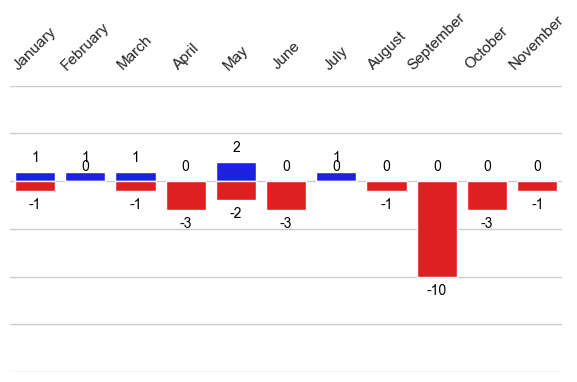

In [ ]:
# Let's look at some monthly stats on joiners (new recruitment) and leavers for the last year
# create a dataframe to contain the number of joiners and leavers each month
# we will use the month as the index for the dataframe

print("\nJoiners and leavers in ", current_year, "\n")

df_joiners_leavers_monthly = pd.DataFrame(columns=["joiners", "leavers", "increase"])
df_joiners_leavers_monthly.index.name = "month"

for x in range(1, 12):
    # find the joiners for these months
    df8 = df[(df.start.dt.month.eq(x)) & (df.start.dt.year.eq(current_year))]
    df8.style.format(na_rep="")
    # find the leavers for these months
    df9 = df[(df.end.dt.month.eq(x)) & (df.end.dt.year.eq(current_year))]
    df9.style.format(na_rep="")

    df_joiners_leavers_monthly.at[x, "leavers"] = len(df9)
    df_joiners_leavers_monthly.at[x, "joiners"] = len(df8)

# calculate the difference
df_joiners_leavers_monthly["increase"] = (
    df_joiners_leavers_monthly.joiners - df_joiners_leavers_monthly.leavers
)

plt.figure(figsize=(6, 4))
plot = sns.barplot(
    df_joiners_leavers_monthly,
    x=df_joiners_leavers_monthly.index,
    y="joiners",
    alpha=1,
    color="blue",
)
plot = sns.barplot(
    df_joiners_leavers_monthly,
    x=df_joiners_leavers_monthly.index,
    y=-df_joiners_leavers_monthly.leavers,
    alpha=1,
    color="red",
)

plot.bar_label(
    plot.containers[0],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=10,
    padding=5,
)
plot.bar_label(
    plot.containers[1],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=10,
    padding=5,
)
plot.set(xlabel="", ylabel="", title="")
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["bottom"].set_visible(False)
plot.spines["left"].set_visible(False)

plot.set_xticklabels(
    [
        calendar.month_name[i]
        for i in range(1, 13)
        if i in df_joiners_leavers_monthly.index
    ]
)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.xaxis.tick_top()
plot.xaxis.set_label_position("top")
plot.set_ylim([-20, 10])
plot.set(yticklabels=[])
# Remove all tick marks
plot.tick_params(left=False, bottom=False, top=False, right=False)
# set or suppress the x and y axis labels
plot.set_ylabel("")
plot.set_xlabel("")
# set or suppress title
plot.set_title("")

# Remove extra space at bottom
plt.tight_layout()
plt.subplots_adjust(bottom=0.05)

plt.show()


## HEADCOUNT CHANGES - 5 year history

In [45]:
# Let's create a comprehensive 5-year view of joiners and leavers
# Including future hires and leavers for the current year (2025)

# Calculate the past 5 years including current year
current_year = pd.Timestamp.now().year
start_year = current_year - 4  # 5 years total: current year and 4 previous years

df_joiners_leavers_5yr = pd.DataFrame(columns=['joiners', 'leavers', 'future_joiners', 'future_leavers', 'increase', 'total_start', 'total_end'])
df_joiners_leavers_5yr.index.name = 'year'

for year in range(start_year, current_year + 1):
    # Find the joiners for this year (already started)
    joiners_started = df[df.start.dt.year.eq(year) & (df.start <= today)]
    
    # Find future joiners for this year (not yet started)
    if year == current_year:
        future_joiners = df[df.start.dt.year.eq(year) & (df.start > today)]
    else:
        future_joiners = pd.DataFrame()  # No future joiners for past years
    
    # Find the leavers for this year (already left)
    leavers_left = df[df.end.dt.year.eq(year) & (df.end <= today) & df.end.notna()]
    
    # Find future leavers for this year (will leave but haven't yet)
    if year == current_year:
        future_leavers = df[df.end.dt.year.eq(year) & (df.end > today) & df.end.notna()]
    else:
        future_leavers = pd.DataFrame()  # No future leavers for past years
    
    # Find the active employees at the start of the year
    total_start = df[(df.start <= pd.Timestamp(f'{year}-01-01')) & 
                     ((df.end.isna()) | (df.end > pd.Timestamp(f'{year}-01-01')))]
    
    # Find the active employees at the end of the year
    total_end = df[(df.start <= pd.Timestamp(f'{year}-12-31')) & 
                   ((df.end.isna()) | (df.end > pd.Timestamp(f'{year}-12-31')))]
    
    # Store the data
    df_joiners_leavers_5yr.at[year, 'joiners'] = len(joiners_started)
    df_joiners_leavers_5yr.at[year, 'leavers'] = len(leavers_left)
    df_joiners_leavers_5yr.at[year, 'future_joiners'] = len(future_joiners)
    df_joiners_leavers_5yr.at[year, 'future_leavers'] = len(future_leavers)
    df_joiners_leavers_5yr.at[year, 'total_start'] = len(total_start)
    df_joiners_leavers_5yr.at[year, 'total_end'] = len(total_end)

# Calculate the net increase (including future hires/leavers for current year)
df_joiners_leavers_5yr['increase'] = (df_joiners_leavers_5yr.joiners + df_joiners_leavers_5yr.future_joiners - 
                                      df_joiners_leavers_5yr.leavers - df_joiners_leavers_5yr.future_leavers)

print(f"\n5-Year Joiners, Leavers, and Headcount Summary ({start_year}-{current_year}):\n")
print("Note: For 2025, 'future_joiners' = signed but not yet started, 'future_leavers' = end date set but not yet left")

display(df_joiners_leavers_5yr.style.format({
    'joiners': '{:,.0f}',
    'leavers': '{:,.0f}',
    'future_joiners': '{:,.0f}',
    'future_leavers': '{:,.0f}',
    'increase': '{:+,.0f}',
    'total_start': '{:,.0f}',
    'total_end': '{:,.0f}'
}))

# Show details for current year future hires and leavers
if current_year in df_joiners_leavers_5yr.index:
    future_joiners_count = df_joiners_leavers_5yr.loc[current_year, 'future_joiners']
    future_leavers_count = df_joiners_leavers_5yr.loc[current_year, 'future_leavers']
    
    if future_joiners_count > 0:
        #print(f"\nFuture hires in {current_year} (signed but not yet started):")
        future_hires = df[df.start.dt.year.eq(current_year) & (df.start > today)]
        #display(future_hires[['fname', 'lname', 'start', 'function', 'dept', 'title', 'country']]
        #        .style.format({'start': lambda t: t.strftime("%Y-%m-%d")}))
    
    if future_leavers_count > 0:
        #print(f"\nFuture leavers in {current_year} (end date set but not yet left):")
        future_leavers = df[df.end.dt.year.eq(current_year) & (df.end > today) & df.end.notna()]
        #display(future_leavers[['fname', 'lname', 'end', 'function', 'dept', 'title', 'country']]
        #        .style.format({'end': lambda t: t.strftime("%Y-%m-%d")}))


5-Year Joiners, Leavers, and Headcount Summary (2021-2025):

Note: For 2025, 'future_joiners' = signed but not yet started, 'future_leavers' = end date set but not yet left


,joiners,leavers,future_joiners,future_leavers,increase,total_start,total_end
year,,,,,,,
2021,30,21,0,0,+9,101,110
2022,42,22,0,0,+20,110,130
2023,23,41,0,0,-18,132,112
2024,16,19,0,0,-3,112,109
2025,6,24,1,1,-18,109,91
